In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations

**Q1.** Write code to create a DataFrame from a dictionary containing student names and their scores in three subjects (Math, Science, English).<br/>
* Write a code to add a new column `Total Marks`, which calculates the total marks for each student.
* Print first five rows of the DataFrame and summary statistics using the `describe()` method.


```python
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
```

In [35]:
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
marks = pd.DataFrame(data)
marks['Total Marks'] = marks['Math'] + marks['Science'] + marks['English']
display(marks.head(5))
marks.describe()

,Name,Math,Science,English,Total Marks
0,Virat,90,85,78,253
1,Dhoni,80,88,85,253
2,Rohit,85,90,82,257
3,Sachin,70,75,90,235
4,Gavaskar,95,92,88,275


,Math,Science,English,Total Marks
count,5.000000,5.000000,5.000000,5.000000
mean,84.000000,86.000000,84.600000,254.600000
std,9.617692,6.670832,4.774935,14.240786
min,70.000000,75.000000,78.000000,235.000000
25%,80.000000,85.000000,82.000000,253.000000
50%,85.000000,88.000000,85.000000,253.000000
75%,90.000000,90.000000,88.000000,257.000000
max,95.000000,92.000000,90.000000,275.000000


**Q2.** Create a dummy CSV file named students.csv containing the following columns: Name, Age, Gender, and Marks (atleast 5 entries). Perform the following tasks:

- Load the file into a DataFrame using Pandas.
- Display the last 3 rows of the DataFrame.
- Print the total number of rows and columns in the DataFrame.

In [36]:
student_data = pd.read_csv('students.csv')
display(student_data.head(3))
print("Total number of columns in this dataset are: ", student_data.columns.size)
print("Total number of rows in this dataset are: ", student_data.index.size)

,Name,Age,Gender
0,Daksh,18,Male
1,Beli,18,Female
2,Siya,18,Female


Total number of columns in this dataset are:  3
Total number of rows in this dataset are:  5


**Q3.** Create and populate a DataFrame with columns Employee_ID, Name, Department, and Salary. Now perform the following:

- Add a new column Bonus where each employee gets 10% of their Salary.
- Increase the Salary of all employees in the IT department by 20%.
- Drop the Department column from the DataFrame.


In [37]:
data = {
    'Employee_ID': [1001, 1002, 1003, 1004, 1005],
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Salary': [10000, 20000, 15000, 12000, 25000],
    'Department': ['IT', 'HR', 'Finance', 'IT', 'HR']
}
employee_data = pd.DataFrame(data)
employee_data.eval('Bonus = Salary * 0.1', inplace=True)
employee_data.loc[employee_data['Department'] == 'IT', 'Salary'] *= 1.2
employee_data.drop('Department', axis=1, inplace=True)
display(employee_data.head(5))

,Employee_ID,Name,Salary,Bonus
0,1001,Virat,12000,1000.0
1,1002,Dhoni,20000,2000.0
2,1003,Rohit,15000,1500.0
3,1004,Sachin,14400,1200.0
4,1005,Gavaskar,25000,2500.0


# 2. Indexing and Slicing

**Q1.** You are given a data about employees' performance:

```python
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
```
Using boolean indexing, select employees who meet all of the following conditions:

- Belong to either 'HR' or 'IT' departments.
- Have a performance rating greater than or equal to 8.0.
- Earn a salary less than 55,000 or have been with the company for at least 4 years.


In [38]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
employee_data = pd.DataFrame(data)
boolean_mask = ((employee_data['Department'] == 'IT') | (employee_data['Department'] == 'HR')) & (employee_data['Performance_Rating'] > 8.0) & ((employee_data['Salary'] < 55000) | (employee_data['Years_at_Company'] >= 4))
display(employee_data[boolean_mask])

,Employee,Department,Salary,Performance_Rating,Years_at_Company
0,E1,HR,50000,8.2,5


**Q2.** Slicing Rows and Columns

```
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
```

Use slicing to select the following:

- The last 3 rows of the DataFrame.
- All columns except 'Stock' and 'Rating' from the first 3 rows.

In [39]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
product_data = pd.DataFrame(data)
product_data.loc[product_data.index.size-3 : product_data.index.size,['Product','Price', 'Stock']]


,Product,Price,Stock
2,Tablet,300,50
3,Monitor,150,10
4,Headphones,50,100


**Q3.** Label-based Indexing with `.loc[]` and `.iloc[]`

```
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
```

Using .loc[] and .iloc[], perform the following tasks:

- Select the row corresponding to 'Tom' using label-based indexing.
- Select the first two rows and the 'Salary' and 'Department' columns using position-based indexing.

In [40]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
employee_data = pd.DataFrame(data)
display(employee_data.loc[employee_data["Name"] == 'Tom'])
display(employee_data.iloc[0:2,[2,3]])

,Name,Age,Salary,Department
2,Tom,40,75000,IT


,Salary,Department
0,50000,HR
1,60000,Finance


# 3. GroupBy and Aggregations


**Q1.** You have a dataset of students' test scores. The dataset has the following columns:

* StudentID: Unique ID of the student.
* Subject: The subject of the test.
* Score: The score obtained (out of 100).
```
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
```

* Write a function to calculate the average score for each student. Use this function to group the data by StudentID and find the average score.

In [41]:
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
data.groupby('StudentID').agg({'Score': 'mean'})

,Score
StudentID,
1,90.0
2,89.0
3,85.0




**Q2.** Create  a dataset of retail sales with a hierarchical index consisting of `Region` and `StoreID`. The dataset contains the following columns:

* ProductCategory: The category of the product sold (e.g., Electronics, Clothing)

* Sales: The amount of sales made

Group the data by respective level indices  and calculate:

* Total sales in each region.
* Average sales in each store .


In [42]:
data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'StoreID': [1, 2, 3, 4, 5, 6, 7, 8],
    'ProductCategory': ['Electronics', 'Furniture', 'Clothing', 'Electronics', 'Furniture', 'Clothing', 'Electronics', 'Furniture'],
    'Sales': [10000, 20000, 15000, 12000, 25000, 30000, 35000, 40000]
}
sales_data = pd.DataFrame(data)
display(sales_data.groupby('Region').agg({'Sales': 'sum'}))
display(sales_data.groupby("StoreID").agg({'Sales': 'mean'}))

,Sales
Region,
East,50000
North,35000
South,50000
West,52000


,Sales
StoreID,
1,10000.0
2,20000.0
3,15000.0
4,12000.0
5,25000.0
6,30000.0
7,35000.0
8,40000.0


**Q3.** You are given a DataFrame `df_orders` as follows:

```
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
```
- Group the data by "`Category`" and compute:
  - Total revenue `(Price * Quantity)`.
  - Total discounts given` (Discount * Quantity)`.

- For each category find the followng:
  * The order with the highest revenue.
  * The average discount per order.




In [43]:
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
df_orders.eval('Total_revenue = Price * Quantity', inplace=True)
df_orders.eval('Total_discount = Quantity * Discount', inplace=True)

grouped_data_by_category = df_orders.groupby('Category')

display(grouped_data_by_category.agg({'Total_revenue': 'sum', 'Total_discount': 'sum'}))

display(df_orders.iloc[grouped_data_by_category["Total_revenue"].idxmax()])
display(grouped_data_by_category.agg({'Discount': 'mean'}))



,Total_revenue,Total_discount
Category,,
Clothing,500,50
Electronics,2000,100
Groceries,500,50


,Category,Order_ID,Price,Discount,Quantity,Total_revenue,Total_discount
2,Clothing,O3,100,10,3,300,30
0,Electronics,O1,1000,50,1,1000,50
5,Groceries,O6,60,6,5,300,30


,Discount
Category,
Clothing,15.0
Electronics,37.5
Groceries,5.5


# 4. Handling Missing Data

You are provided with a dataset, `numeric_df`, containing numeric features from the Titanic dataset. Your task is to explore and handle the missing data systematically.



In [44]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size=int(0.05 * len(numeric_df)), replace=False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size=int(0.70 * len(numeric_df)), replace=False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

**Q1.** **Load and Inspect the Data**
- Run the cell below to get the dataset `numeric_df`.
- Display the first 5 rows of the dataset.
- Create a **heatmap** to visualize where the missing values occur.
- Count the missing values in each column and report them (also, plot them).
- Drop the column with more than 60 percent `NaN` values. Why?


In [45]:
numeric_df.head(5)


,survived,pclass,age,sibsp,parch,fare
0,0,3.0,22.0,1,0.0,7.2500
1,1,1.0,38.0,1,NaN,71.2833
2,1,3.0,26.0,0,NaN,7.9250
3,1,1.0,35.0,1,0.0,53.1000
4,0,3.0,35.0,0,0.0,8.0500




**Q2** **Handle Missing Values**
- For the `pclass` column, use **mode imputation** to fill the missing values.
- Explain why mode imputation is appropriate for this column.

- How would you impute the values for the column `age`. Why?



**Q3** **Analyze Results**
- Compare the dataset before and after imputation:
  - Count the missing values after imputation.
  - Calculate the **mean** of all numeric columns before and after imputation.

# 5. Pandas: Merging Joining and Concatenation

**Q1.** You have two DataFrames `df1` and `df2` where `df1` has a column `student_id` and `df2` has a column `student_id` along with `grade`, how would you merge these DataFrames on `student_id` to keep only the rows present in both DataFrames? Show output of the merge.

```python
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
```


**Q2.** If you are provided with two DataFrames, employees and departments with `employee_id` as the index, how would you join them such that all rows from the employees DataFrame are kept, even if there is no matching department record? (you may assume employees have 2nd column as `employee_name` and departments have 2nd column as `department_name`, and randomly assign its data)

```python
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
```



**Q3**. Given two DataFrames `df_a` and `df_b` with the same columns, how would you concatenate them vertically, resetting the index so it starts from zero in the combined DataFrame? (you may assume both dataframes have 2 columns each, and randomly assign its data)

```python
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)
```


In [46]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df1.merge(df2, on='student_id', how='inner')

,student_id,name,grade
0,2,Bob,A
1,3,Charlie,B
2,4,David,C


In [47]:
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
employees.merge(departments, on='employee_id', how='left')


,employee_id,employee_name,department_name
0,1,Alice,D
1,2,Bob,A
2,3,Charlie,B
3,4,David,C


In [48]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

pd.concat([df_a, df_b], ignore_index=True)

,student_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Anish
5,6,Divakar
6,7,Vaibhav
7,8,Tanvi


# 6. Pandas: Advanced Operations (Evaluation and Query)




You are provided with the dataset, `iris`, which contains information about iris flower species and their physical measurements. Your task is to use :


**Q1** **Pandas advanced operations** such as evaluation (`eval`) and conditional querying (`query`) to analyze and extract insights from the dataset.



**Q2** **Load and Inspect the Data**
- Run `iris = sns.load_dataset('iris')` to load the dataset.
- Display the first 5 rows of the dataset.
- Print the summary statistics of the dataset.


**Q3** **Filter the Data Using `query`**
- Use the `query` method to:
  1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
  2. Find all `virginica` flowers with a `petal_width` less than 2.



**Q4** **Use `eval` for Calculations**
- Create a new column `petal_area` using the formula:  
  `petal_area = petal_length * petal_width`
- Display the top 5 flowers with the largest `petal_area`.
- Use `query` to filter flowers that meet the following conditions:
  - `petal_area` > 10
  - `sepal_length` is in the range 5 to 7.



**Q5** **Analyze and Visualize**
- Perform a group-wise analysis:
  1. Calculate the **average petal length** for each species.
  2. Find the **count of flowers** for each species.
  3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.


In [49]:
iris = sns.load_dataset('iris')
display(iris.head(5))
display(iris.describe())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
display(iris.query("sepal_length > 6.5 and petal_length > 5"))
display(iris.query("species == 'virginica' and petal_width < 2"))

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
112,6.8,3.0,5.5,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
103,6.3,2.9,5.6,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
116,6.5,3.0,5.5,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
123,6.3,2.7,4.9,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica


In [51]:
iris.eval('petal_area = petal_length * petal_width', inplace=True)
display(iris.sort_values(by='petal_area', ascending=False).head(5))
display(iris.query("petal_area > 10 and 7 > sepal_length > 5"))

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
118,7.7,2.6,6.9,2.3,virginica,15.87
109,7.2,3.6,6.1,2.5,virginica,15.25
100,6.3,3.3,6.0,2.5,virginica,15.00
117,7.7,3.8,6.7,2.2,virginica,14.74
144,6.7,3.3,5.7,2.5,virginica,14.25


,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
100,6.3,3.3,6.0,2.5,virginica,15.00
103,6.3,2.9,5.6,1.8,virginica,10.08
104,6.5,3.0,5.8,2.2,virginica,12.76
108,6.7,2.5,5.8,1.8,virginica,10.44
110,6.5,3.2,5.1,2.0,virginica,10.20
111,6.4,2.7,5.3,1.9,virginica,10.07
112,6.8,3.0,5.5,2.1,virginica,11.55
114,5.8,2.8,5.1,2.4,virginica,12.24
115,6.4,3.2,5.3,2.3,virginica,12.19
120,6.9,3.2,5.7,2.3,virginica,13.11


,petal_length
species,
setosa,1.462
versicolor,4.260
virginica,5.552


,species
species,
setosa,50
versicolor,50
virginica,50


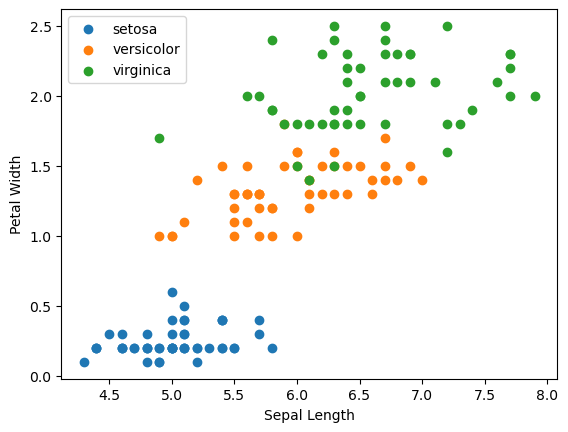

In [52]:
grouped_data_by_species = iris.groupby('species')
display(grouped_data_by_species.agg({'petal_length': 'mean'}))
display(grouped_data_by_species.agg({'species': 'count'}))
fig, ax = plt.subplots()
for species, group in grouped_data_by_species:
    ax.scatter(group['sepal_length'], group['petal_width'], label=species)
ax.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()


# 7. Matplotlib: Basic Plotting Questions

**Q1. Line Plot**

Plot a sine wave (\(y = sin(x)\)) for \(x in [0, 2π]\). Customize the plot by:
1. Adding a title to the graph.
2. Adding labels for the x-axis and y-axis.
3. Displaying a grid.


**Q2. Multiple Line Plots**

Plot the following functions on the same graph for \(x \in [0, 2π]\):
1. \(y_1 = sin(x)\)
2. \(y_2 = cos(x)\)
Customize the graph by:
- Using different colors and line styles for each function.
- Adding a legend to identify the curves.



**Q3. Plot Customization**

Plot the function \(y = x^2\) for \(x \in [-10, 10]\). Customize the plot by:
1. Adding a title and axis labels.
2. Changing the line style, color, and thickness.
3. Adjusting the axis limits to make the graph more visually appealing.


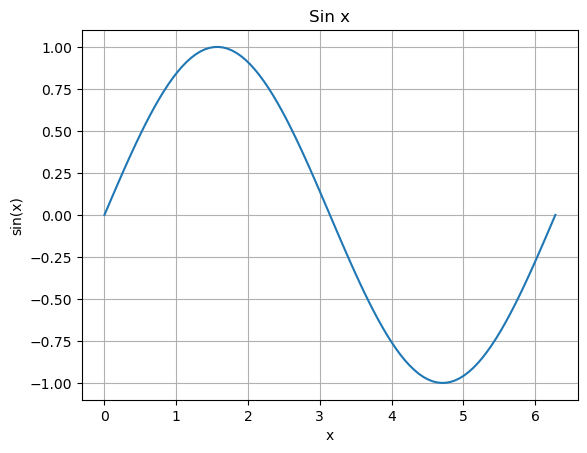

In [53]:
x = np.linspace(0, 2*np.pi, 100)
y_sin = np.sin(x)
fig, ax = plt.subplots()
ax.set_title('Sin x')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.grid()
ax.plot(x, y_sin)
plt.show()

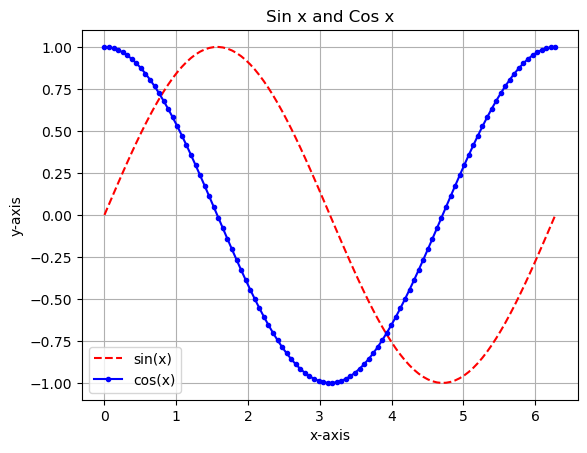

In [54]:
y_1 = np.sin(x) 
y_2 = np.cos(x)
fig, ax = plt.subplots()
ax.plot(x, y_1, 'r--',label='sin(x)')
ax.plot(x, y_2, 'b.-',label='cos(x)')
ax.set_title('Sin x and Cos x')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.legend()
ax.grid()
plt.show()

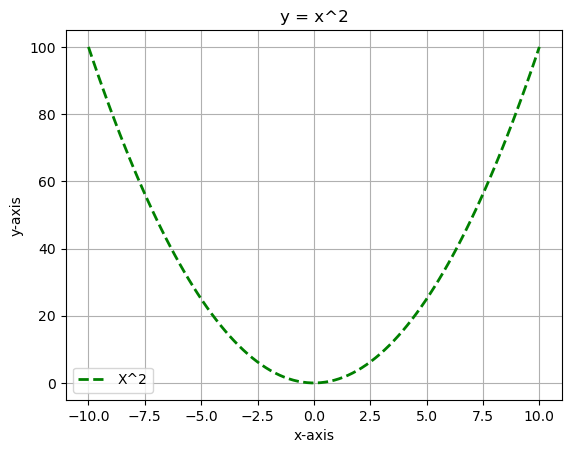

In [55]:
x = np.linspace(-10,10,100)
y = x**2
fig, ax = plt.subplots()
ax.plot(x, y,label='X^2',color='green',linestyle='--',linewidth = 2)
ax.set_title('y = x^2')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
plt.legend()
plt.grid()
plt.show()

# 8a. Bar Plot

**Q1** You are provided with the `tips` dataset. Your task is to create a **bar plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
```
- Create a bar plot showing the average tip for each day of the week.
Label the x-axis as Day, the y-axis as Average Tip, and add a title: "Average Tip by Day".

- Based on the bar plot, which day has the highest average tip?


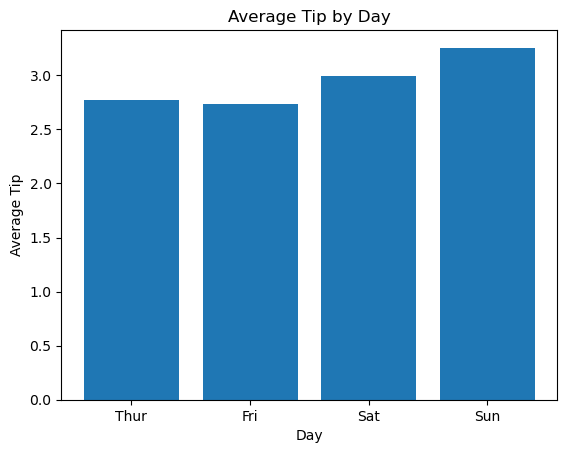

In [56]:
tips = sns.load_dataset('tips')
fig,axis = plt.subplots()
y = tips.groupby('day').agg({'tip':'mean'})
axis.set_title('Average Tip by Day')
axis.set_xlabel('Day')
axis.set_ylabel('Average Tip')
axis.bar(y.index,y['tip'])
plt.show()

Based on the bar-plot above the **Sunday** has the highest average tip

# 8b. Scatter Plot

**Q1.** You are provided with the `tips` dataset. Your task is to create a **scatter plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
  ```

- Create a scatter plot with total_bill on the x-axis and tip on the y-axis.
- Label the x-axis as Total Bill, the y-axis as Tip, and add a title: "Relationship between Total Bill and Tip".

- Based on the scatter plot, do you observe any relationship between total_bill and tip?


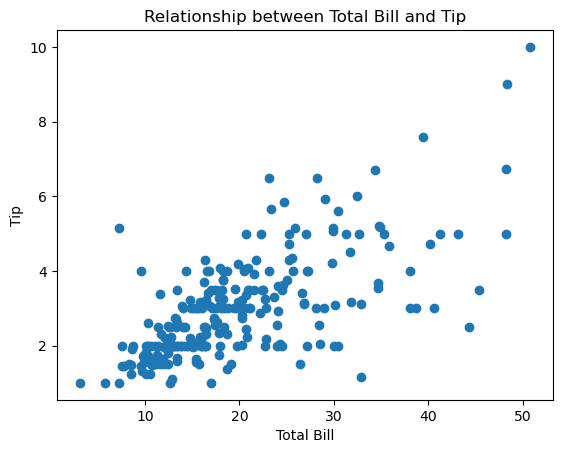

In [57]:
x = tips['total_bill']
y = tips['tip']
fig, axis = plt.subplots()
axis.set_title('Relationship between Total Bill and Tip')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Tip')
axis.scatter(x, y)
plt.show()

There appears to be a positive relationship between `total_bill` and `tip`. As the total bill increases, the tip generally tends to increase as well. However, the relationship **does not appear to be perfectly linear**, and there is some **variability** in the amount of tip given for a given total bill

# 9. Matplotlib: Subplots and Layouts

**Q1.** Create a 2x2 grid of subplots with:
- Subplot (1,1): Plot y = sin(x).
- Subplot (1,2): Plot y = cos(x) .
- Subplot (2,1): Plot y = e<sup>−x</sup>
- Subplot (2,2): Plot y=ln(x) for x∈[0.1,2].

Customize background colors, add unique x and y labels, and set titles.

**Q2.** Create a subplot within another subplot:
- Main subplot: Display a scatter plot of 100 random points with x and y values between 0 and 1.
- Inset subplot: Display a histogram of the x-values from the scatter plot.

**Q3.** Create a Layout with One Large and Two Smaller Subplots

- Design a large subplot occupying the top two-thirds of the figure and plot \( y = sin(x) \) and \( y = cos(x) \) on the same graph.  

- Create two smaller subplots in the bottom row:  
   - On the left, plot y =x<sup>2</sup>.  
   - On the right, plot y = e<sup>x</sup>.  

Ensure each subplot has appropriate titles, axis labels, and legends where necessary. Use a clean layout that avoids overlapping elements.




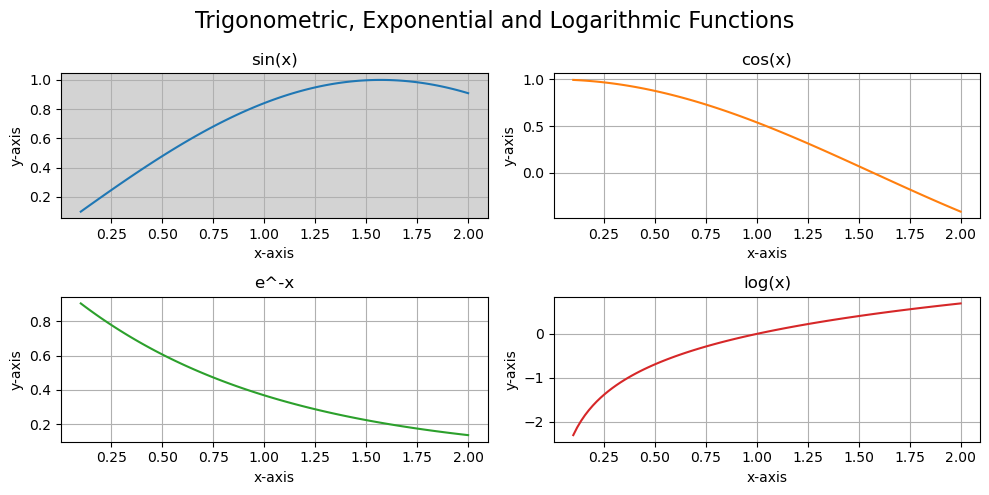

In [58]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
x = np.linspace(0.1,2,100)
func_df = pd.DataFrame({
    'sinx': np.sin(x),
    'cosx': np.cos(x),
    'e^-x': np.exp(-x),
    'logx': np.log(x)
},index=x)

func_df.plot(subplots=True,ax=axes,title=['sin(x)','cos(x)','e^-x','log(x)'],xlabel='x-axis',ylabel='y-axis',grid=True,legend=False)
fig.suptitle('Trigonometric, Exponential and Logarithmic Functions',fontsize=16)
axes[0,0].set_facecolor('lightgrey')
fig.tight_layout()

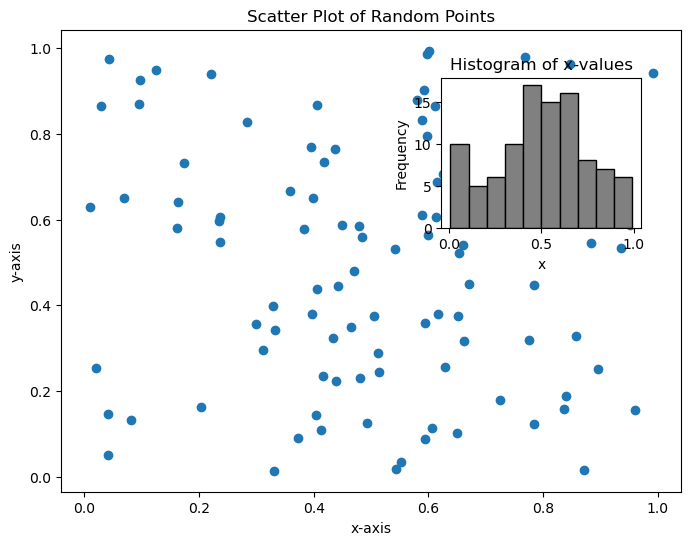

In [59]:
x = np.random.rand(100)
y = np.random.rand(100)
fig, main_ax = plt.subplots(figsize=(8, 6))
main_ax.scatter(x, y)
main_ax.set_title('Scatter Plot of Random Points')
main_ax.set_xlabel('x-axis')
main_ax.set_ylabel('y-axis')
inset_ax = fig.add_axes([0.6, 0.55, 0.25, 0.25]) 
inset_ax.hist(x, bins=10, color='gray', edgecolor='black')
inset_ax.set_title('Histogram of x-values')
inset_ax.set_xlabel('x')
inset_ax.set_ylabel('Frequency')

plt.show()

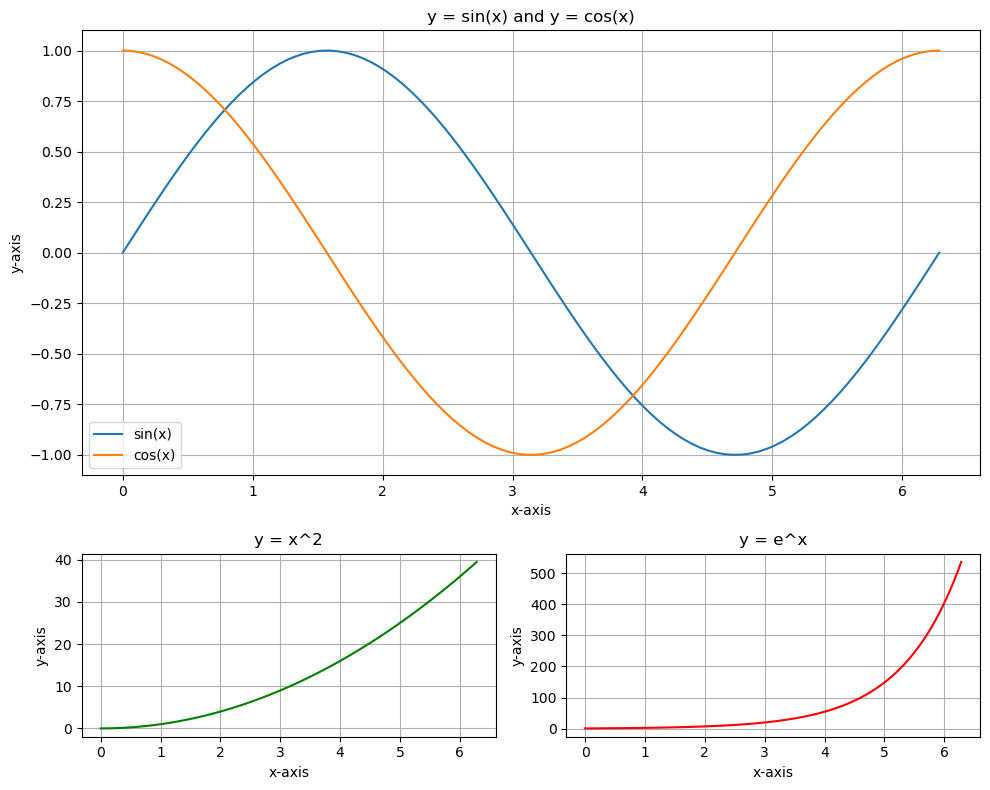

In [60]:
x = np.linspace(0, 2 * np.pi, 100)


fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=2)
ax1.plot(x, np.sin(x), label='sin(x)')
ax1.plot(x, np.cos(x), label='cos(x)')
ax1.set_title('y = sin(x) and y = cos(x)')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.legend()
ax1.grid(True)


ax2 = plt.subplot2grid((3, 2), (2, 0))
ax2.plot(x, x**2, label='y = x^2', color='green')
ax2.set_title('y = x^2')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.grid(True)


ax3 = plt.subplot2grid((3, 2), (2, 1))
ax3.plot(x, np.exp(x), label='y = e^x', color='red')
ax3.set_title('y = e^x')
ax3.set_xlabel('x-axis')
ax3.set_ylabel('y-axis')
ax3.grid(True)

fig.tight_layout()
fig.show()

# 10. Matplotlib: Advanced Customization

**Q1. Customizing Axes and Ticks**

Create a line plot for y = x^2 in the range -10 to 10.
Customize the axes and ticks:
1. Set x-axis range to -10 to 10.
2. Set y-axis range to 0 to 100.
3. Use custom tick marks at intervals of 2 for x-axis and 10 for y-axis.
4. Rotate x-axis tick labels by 45 degrees.

**Q2. Multiple Subplots with Shared Legend and Grid Customization**

Create a figure with four subplots (2x2 grid) showing different trigonometric functions:
1. Top-left: y = sin(x)
2. Top-right: y = cos(x)
3. Bottom-left: y = tan(x) (restrict x to avoid undefined regions).
4. Bottom-right: y = sin^2(x) + cos^2(x) (should always equal 1).

**Q3. Subplots and Shared Axes**

Create two subplots side-by-side:
1. Bar chart for sales (random data) from January to June.
2. Line chart for cumulative sales.
Share the y-axis and add titles, a common x-axis label, and a grid for the second plot.

**Q4. Adding Annotations**

Create a scatter plot of 10 random points:
1. Annotate the point with the max y-coordinate with a red star and text label.
2. Customize marker size and color for all points.

**Q5. Creating a Custom Colormap**

Generate a heatmap for a 5x5 matrix of random numbers between 0 and 1:
1. Use a custom colormap (blue to red).
2. Add a color bar and display exact cell values rounded to 2 decimals.


**Q6. Customization of 3D Plot**

Using Matplotlib’s mpl_toolkits.mplot3d, create a 3D surface plot for the function:
z = sin(sqrt(x^2 + y^2))

Requirements:
1. Generate x and y values in the range -5 to 5 using a meshgrid.
2. Use a custom colormap that highlights peaks and valleys (e.g., `coolwarm`).
3. Add a color bar with a label "Amplitude".
4. Add labels for all three axes and a title.
5. Rotate the 3D plot to a custom viewing angle using ax.view_init.

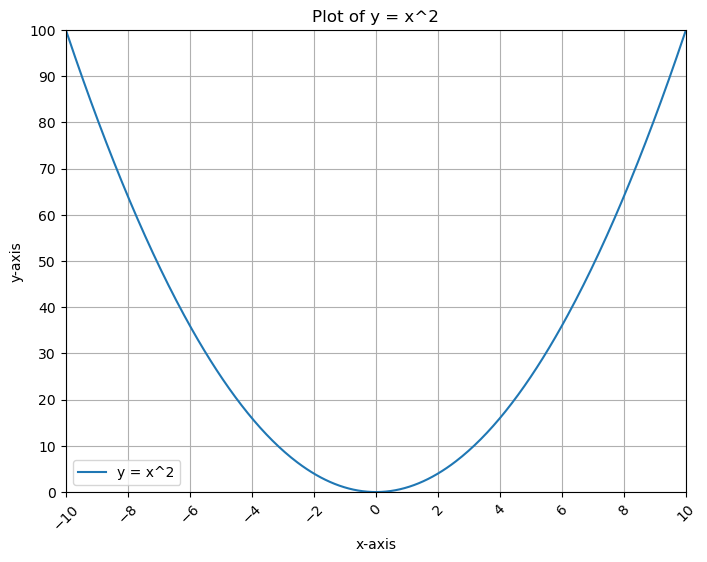

In [61]:
x = np.linspace(-10, 10, 400)
y = x**2
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='y = x^2')
ax.set_xlim(-10, 10)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(-10, 11, 2))
ax.set_yticks(np.arange(0, 101, 10))
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Plot of y = x^2')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.show()

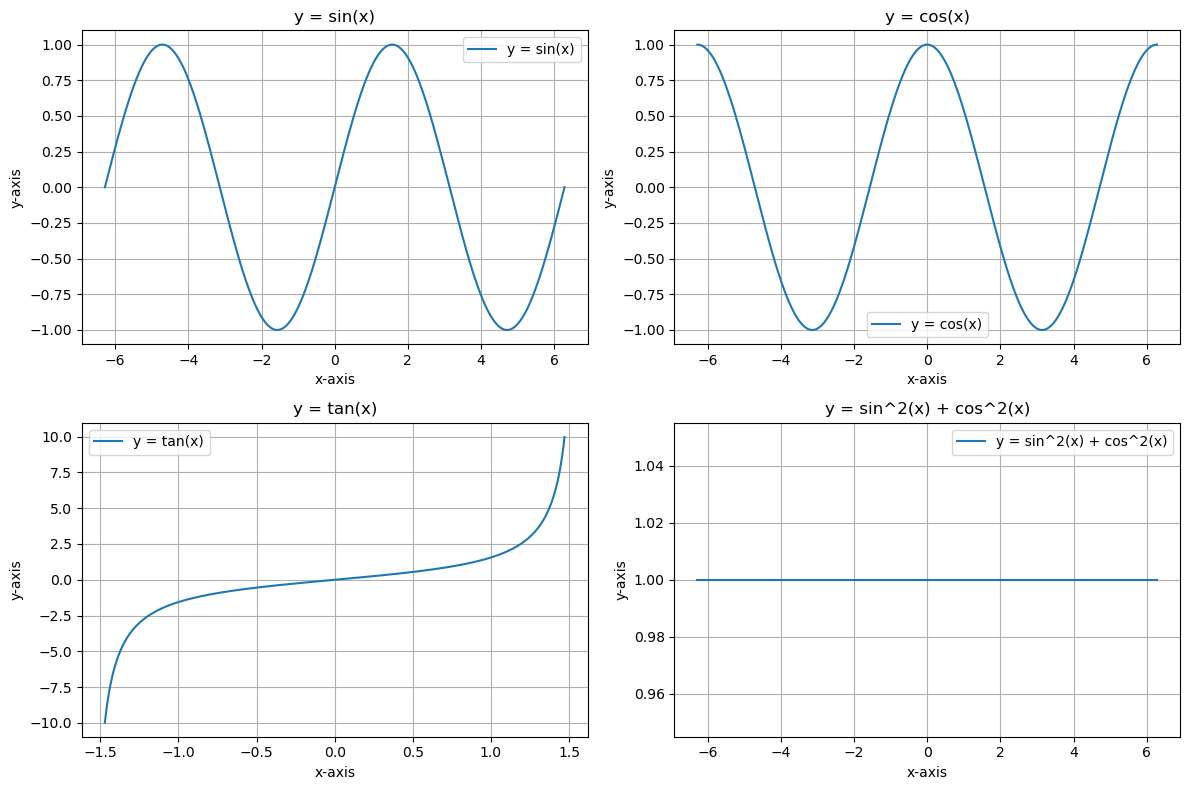

In [62]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x, np.sin(x), label='y = sin(x)')
axes[0, 0].set_title('y = sin(x)')
axes[0, 0].set_xlabel('x-axis')
axes[0, 0].set_ylabel('y-axis')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 1].plot(x, np.cos(x), label='y = cos(x)')
axes[0, 1].set_title('y = cos(x)')
axes[0, 1].set_xlabel('x-axis')
axes[0, 1].set_ylabel('y-axis')
axes[0, 1].legend()
axes[0, 1].grid(True)
x_tan = np.linspace(-np.pi / 2 + 0.1, np.pi / 2 - 0.1, 400)
axes[1, 0].plot(x_tan, np.tan(x_tan), label='y = tan(x)')
axes[1, 0].set_title('y = tan(x)')
axes[1, 0].set_xlabel('x-axis')
axes[1, 0].set_ylabel('y-axis')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 1].plot(x, np.sin(x)**2 + np.cos(x)**2, label='y = sin^2(x) + cos^2(x)')
axes[1, 1].set_title('y = sin^2(x) + cos^2(x)')
axes[1, 1].set_xlabel('x-axis')
axes[1, 1].set_ylabel('y-axis')
axes[1, 1].legend()
axes[1, 1].grid(True)
fig.tight_layout()
plt.show()

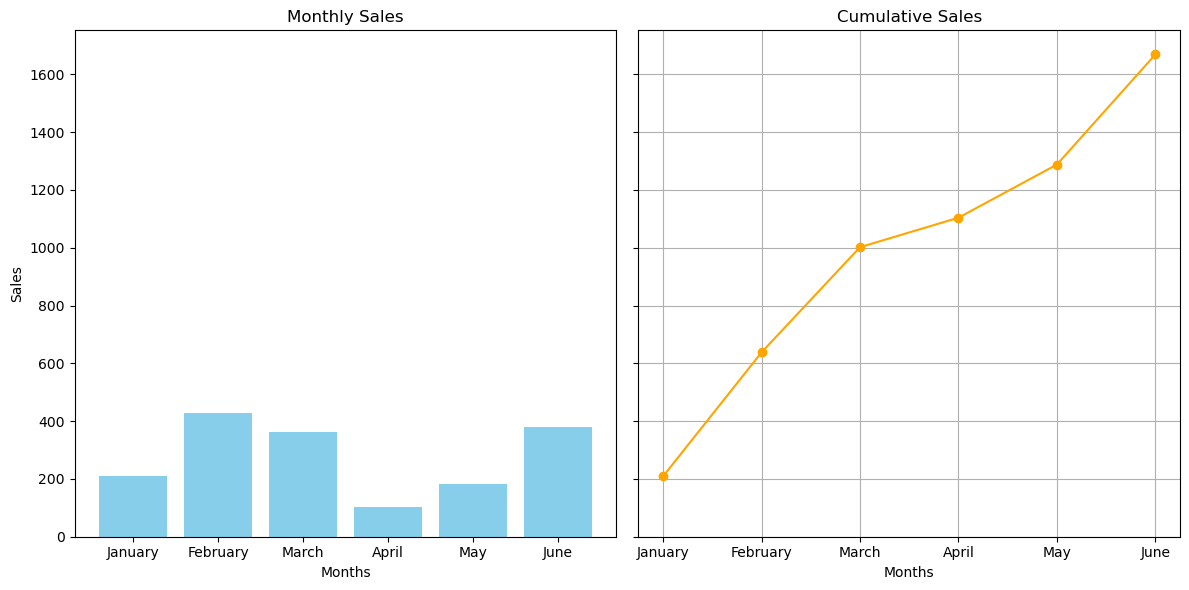

In [63]:
months = ['January', 'February', 'March', 'April', 'May', 'June']
sales = np.random.randint(100, 500, size=6)
cumulative_sales = np.cumsum(sales)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.bar(months, sales, color='skyblue')
ax1.set_title('Monthly Sales')
ax1.set_ylabel('Sales')
ax1.set_xlabel('Months')
ax2.plot(months, cumulative_sales, marker='o', color='orange')
ax2.set_title('Cumulative Sales')
ax2.set_xlabel('Months')
ax2.grid(True)
fig.tight_layout()
plt.show()

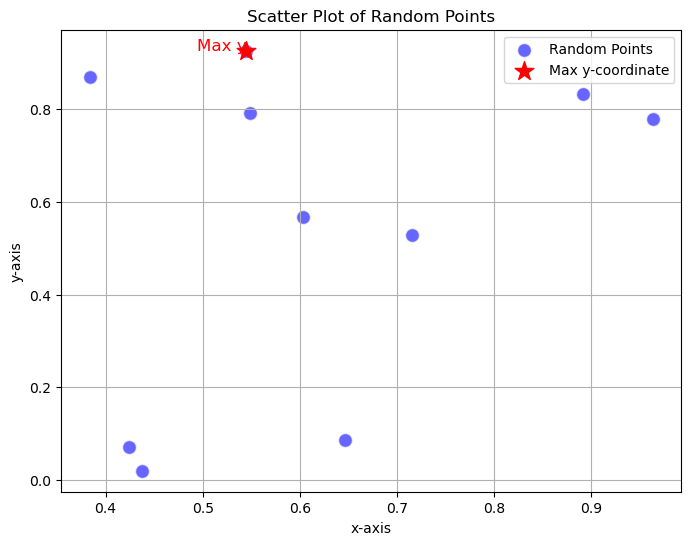

In [64]:
np.random.seed(0)  
x = np.random.rand(10)
y = np.random.rand(10)
max_y_index = np.argmax(y)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=100, c='blue', alpha=0.6, edgecolors='w', label='Random Points')
plt.scatter(x[max_y_index], y[max_y_index], s=200, c='red', marker='*', label='Max y-coordinate')
plt.text(x[max_y_index], y[max_y_index], 'Max y', fontsize=12, ha='right', color='red')
plt.title('Scatter Plot of Random Points')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.grid(True)
plt.show()

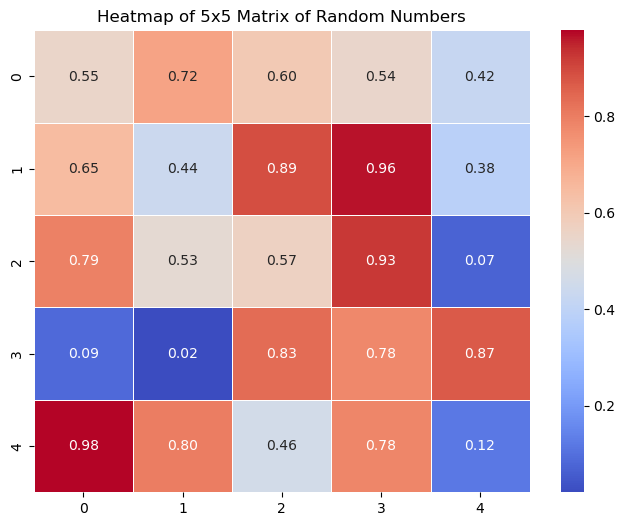

In [65]:
np.random.seed(0) 
data = np.random.rand(5, 5)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of 5x5 Matrix of Random Numbers')
plt.show()

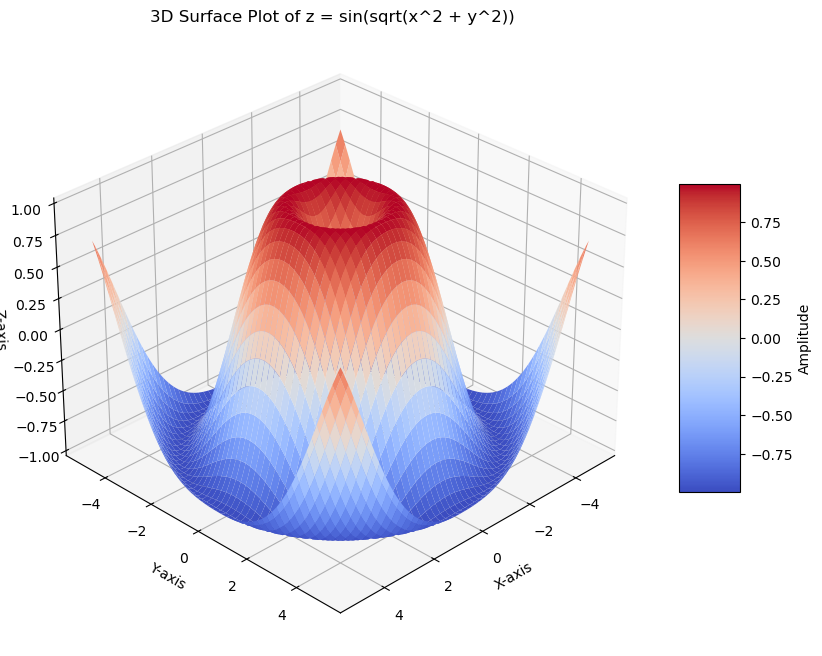

In [66]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none')
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Amplitude')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot of z = sin(sqrt(x^2 + y^2))')
ax.view_init(elev=30, azim=45)
plt.show()